In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [39]:
def f(x,y):
    return x + 2*y

In [40]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [41]:
N = 200
t = np.linspace(0,50,N)


In [42]:
h = t[1] - t[0]

In [43]:
yext = Solucion(t)

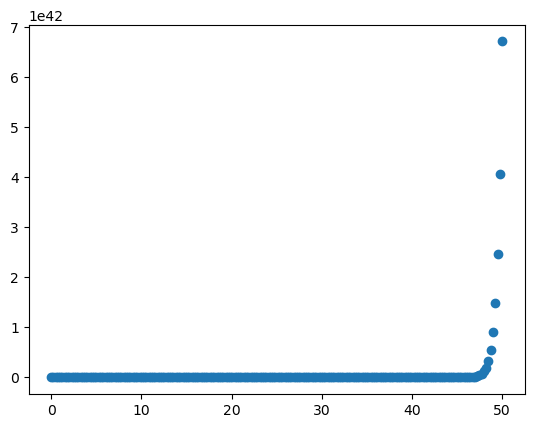

In [44]:
plt.scatter(t,yext)

In [45]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1


In [46]:
def GetRungeKutta3(x,y,h,f):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+h,y[i-1] -h*k1 + 2*h*k2)
        
        y[i] = y[i-1] + (h/6)*(k1+4*k2+k3)

    return y

In [47]:
def GetRungeKutta4(x,y,h,f):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1] +h*k3)
        
        y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)

    return y

In [48]:
y1 = np.zeros_like(t)
y1[0] = 0

In [49]:
y3R=GetRungeKutta3(t,y1,h,f)
y4R=GetRungeKutta3(t,y1,h,f)

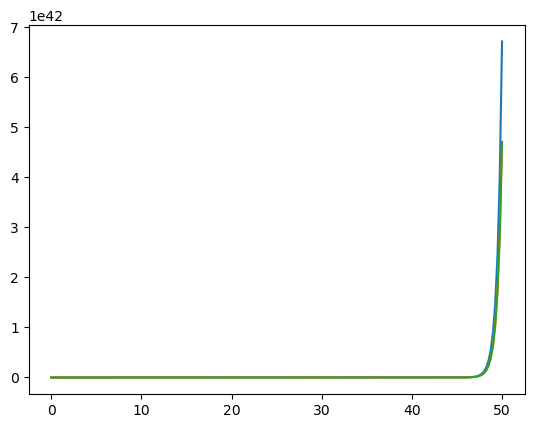

In [50]:
plt.plot(t,yext, label="Solucion")
plt.plot(t,y3R, label="RG3")
plt.plot(t,y4R, label="RG4")


In [51]:
def fc(z):
    return 1j*z

In [52]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [53]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [54]:
Solucion1[-1,1]

(1.2177068419842307-0.010044860504615213j)

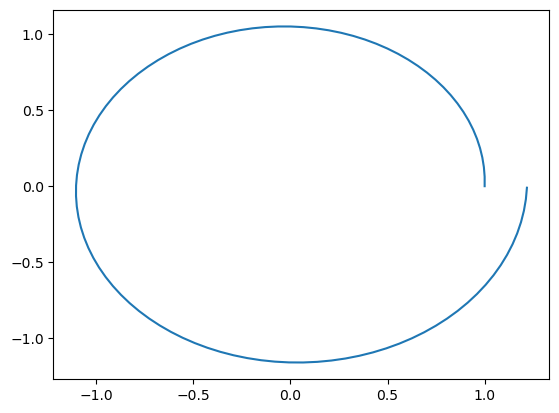

In [55]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

plt.plot(Re,Im)

In [56]:


def ComplexEuler3():

    global theta
    global h_
    global f
    
    theta += h_
        
    k1 = fc(f)
    k2 = fc(f + 0.5*h_*k1)
    k3 = fc(f -h_*k1 + 2*h_*k2)
        
    f += (h_/6)*(k1+4*k2+k3)


def ComplexEuler4():
    
    global theta
    global h_
    global f
    
    theta += h_
        
    k1 = fc(f)
    k2 = fc(f + 0.5*h_*k1)
    k3 = fc(f + 0.5*h_*k2)
    k4 = fc(f +h_*k3)
        
    f+= (h_/6)*(k1+2*k2+2*k3+k4)


In [64]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])
Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])



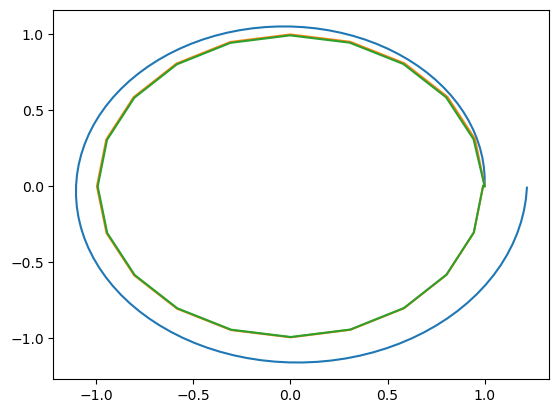

In [65]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion3[:,1])
Im2 = np.imag(Solucion3[:,1])

Re3 = np.real(Solucion4[:,1])
Im3 = np.imag(Solucion4[:,1])


plt.plot(Re,Im, label=" Exact")
plt.plot(Re2,Im2, label="RG3")

plt.plot(Re3,Im3, label="RG4")